<a href="https://colab.research.google.com/github/jaykang1991/Machine_Learning_GlobalIT/blob/main/ML_Regression_KNN_GIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning Regression with KNN

### Input data and plot using matplotlib

In [ ]:
import numpy as np
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0])
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0])

<function matplotlib.pyplot.show>

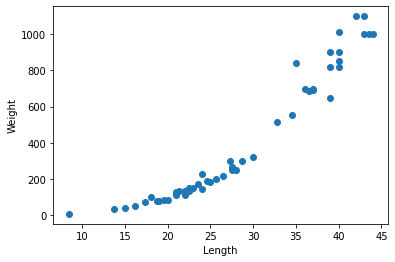

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(perch_length, perch_weight)
plt.xlabel('Length')
plt.ylabel('Weight')
plt.show

### Split train, test data and use KNN regressor for prediction

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight, random_state=42)
print(train_input.shape, test_input.shape)

(42,) (14,)


In [ ]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)
knr.score(test_input, test_target)

0.992809406101064

In [ ]:
from sklearn.metrics import mean_absolute_error
test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae) # 평균 에러 19

19.157142857142862


In [ ]:
print(knr.score(train_input, train_target))

0.9698823289099254


In [ ]:
knr.n_neighbors = 3 # Lowering neighbor number for accurate prediction
knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966

In [ ]:
knr.score(test_input, test_target)

0.9746459963987609

### Using different neighbors(hyper parameter) for KNN Regressor

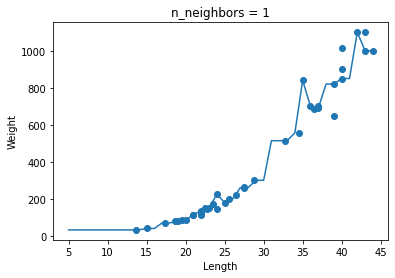

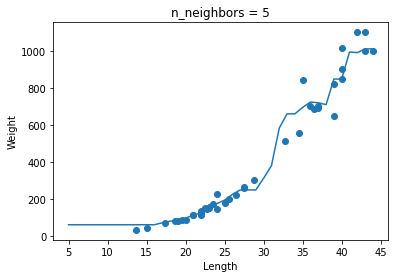

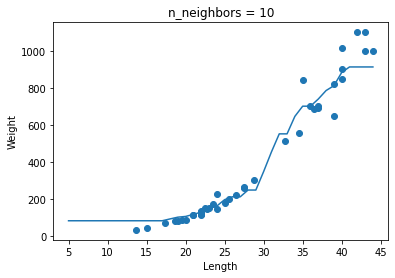

In [ ]:
knr = KNeighborsRegressor()
x = np.arange(5, 45).reshape(-1,1)
for n in [1,5,10]: # To see which neighbors number fits the best
  knr.n_neighbors = n
  knr.fit(train_input, train_target)
  prediction = knr.predict(x)
  plt.scatter(train_input, train_target)
  plt.plot(x, prediction)
  plt.title('n_neighbors = {}'.format(n))
  plt.xlabel('Length')
  plt.ylabel("Weight")
  plt.show()